<decorator-gen-201>:4: FutureWarning: NOTE: psd_welch() is a deprecated function. Function ``psd_welch()`` is deprecated; for Raw/Epochs/Evoked instances use ``spectrum = instance.compute_psd(method="welch")`` instead, followed by ``spectrum.get_data(return_freqs=True)``.
<decorator-gen-201>:4: FutureWarning: NOTE: psd_welch() is a deprecated function. Function ``psd_welch()`` is deprecated; for Raw/Epochs/Evoked instances use ``spectrum = instance.compute_psd(method="welch")`` instead, followed by ``spectrum.get_data(return_freqs=True)``.


ID1 no VR:  IAFEstimate(PeakAlphaFrequency=9.0, CenterOfGravity=8.75, AlphaBand=(7.0, 10.75))
ID1 VR:  IAFEstimate(PeakAlphaFrequency=7.75, CenterOfGravity=8.5, AlphaBand=(7.75, 10.5))
ID2 no VR:  IAFEstimate(PeakAlphaFrequency=11.0, CenterOfGravity=11.5, AlphaBand=(9.5, 13.75))
ID2 VR:  IAFEstimate(PeakAlphaFrequency=9.25, CenterOfGravity=9.25, AlphaBand=(7.5, 11.25))
ID1 VR both closed:  IAFEstimate(PeakAlphaFrequency=10.75, CenterOfGravity=10.75, AlphaBand=(9.5, 12.25))


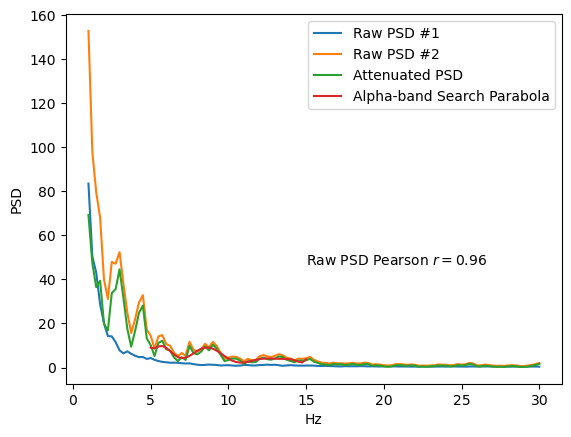

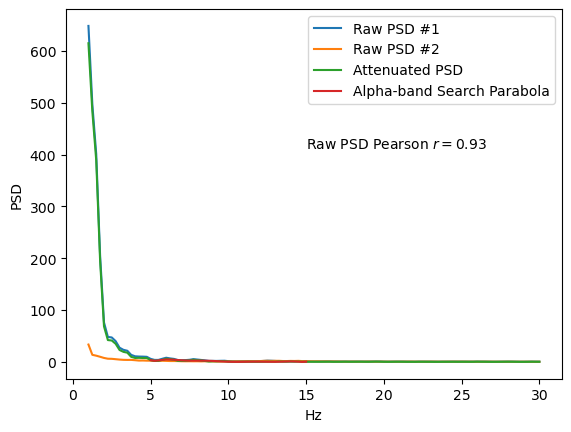

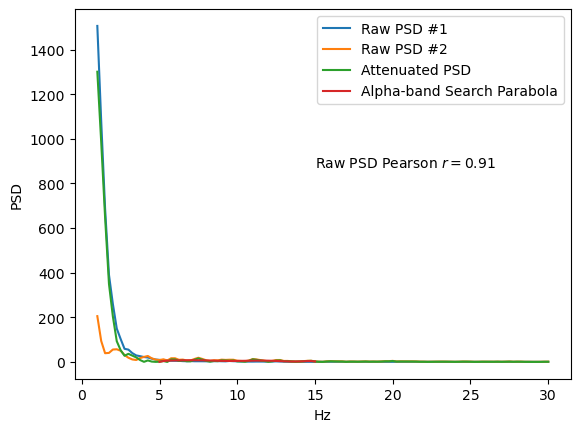

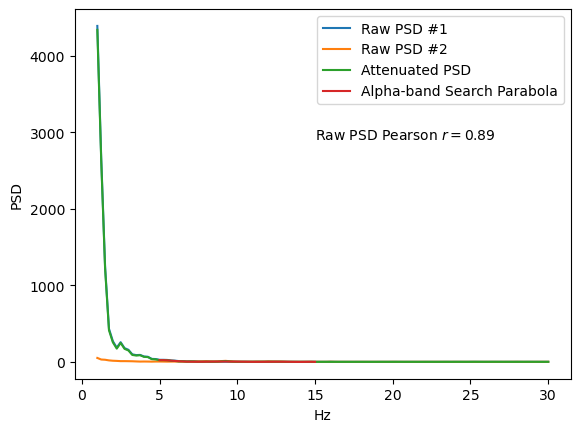

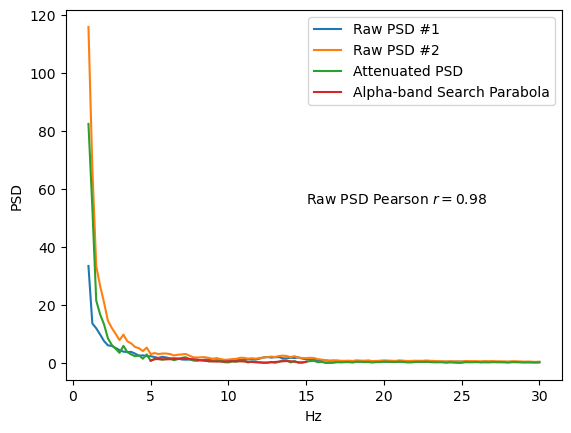

In [1]:
import matplotlib.pyplot as plt
import mne
import philistine
from  Settings import *
from utils import *

mne.set_log_level(False)
mne.utils.set_config('MNE_USE_CUDA', 'true')  
plt.rcParams.update({'figure.max_open_warning': 0})


raw_id1_eyesopen_novr = make_raw("ID101-EEG")
raw_id1_eyesclosed_novr = make_raw("ID103-EEG")
raw_id1_eyesopen_vr = make_raw("ID104-EEG")
raw_id1_eyesclosed_vr = make_raw("ID105-EEG")
raw_id1_eyesclosed2_vr = make_raw("ID107-EEG")


raw_id2_eyesopen_novr = make_raw("ID201-EEG")
raw_id2_eyesclosed_novr = make_raw("ID202-EEG")
raw_id2_eyesopen_vr = make_raw("ID203-EEG")
raw_id2_eyesclosed_vr = make_raw("ID204-EEG")

#e1 = philistine.mne.savgol_iaf(raw = raw_id1_eyesopen_novr, picks='eeg')
id1_novr_alpha = philistine.mne.attenuation_iaf([raw_id1_eyesopen_novr,raw_id1_eyesclosed_novr], picks='eeg')
id1_vr_alpha = philistine.mne.attenuation_iaf([raw_id1_eyesopen_vr,raw_id1_eyesclosed_vr], picks='eeg')
id2_no_vr_alpha = philistine.mne.attenuation_iaf([raw_id2_eyesopen_novr,raw_id2_eyesclosed_novr], picks='eeg')
id2_vr_alpha = philistine.mne.attenuation_iaf([raw_id2_eyesopen_vr,raw_id2_eyesclosed_vr], picks='eeg')

print("ID1 no VR: ", id1_novr_alpha)
print("ID1 VR: ", id1_vr_alpha)
print("ID2 no VR: ", id2_no_vr_alpha)
print("ID2 VR: ", id2_vr_alpha)



id1_vr_alpha_bothclosed = philistine.mne.attenuation_iaf([raw_id1_eyesclosed_vr,raw_id1_eyesclosed2_vr], picks='eeg')
print("ID1 VR both closed: ", id1_vr_alpha_bothclosed)


# v2_id2_vr_alpha = philistine.mne.savgol_iaf(raw_id2_eyesopen_novr, picks='eeg')
# print("V2 ID2 no VR eyes open: ", v2_id2_vr_alpha)

#